Dear Minister of Transport,

I have conducted an analysis of flight data from 2015 to identify problem areas within our aviation system, with a particular focus on various types of delays. This report aims to draw your attention to key deficiencies, such as delays caused by weather conditions, airline internal processes, and late aircraft, while offering specific measures to address them. Below, I present the main findings and recommendations.

----------------

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('datasets/flights.csv', low_memory=False)
df_airports = pd.read_csv('datasets/airports.csv', low_memory=False)
df_airlines = pd.read_csv('datasets/airlines.csv', low_memory=False)

In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

In [5]:
df_mask = df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)
df = df.loc[~df_mask]

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5726566.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5726566.0,6.547739,3.396818,1.0,4.0,7.0,9.0,12.0
DAY,5726566.0,15.708384,8.774499,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5726566.0,3.932544,1.986050,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5726566.0,2164.559220,1754.781875,1.0,728.0,1681.0,3211.0,9320.0
SCHEDULED_DEPARTURE,5726566.0,1328.843506,483.466724,1.0,916.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5726566.0,1335.033781,496.365687,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5726566.0,9.317259,36.932937,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5726566.0,16.070213,8.891484,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5726566.0,1357.074860,497.970089,1.0,935.0,1343.0,1754.0,2400.0


In [7]:
df[df['DEPARTURE_DELAY'] > 0].describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,2121333.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,2121333.0,6.375817,3.401951,1.0,3.0,6.0,9.0,12.0
DAY,2121333.0,15.654093,8.759687,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,2121333.0,3.927113,1.985783,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,2121333.0,2038.699152,1684.063620,1.0,704.0,1567.0,2924.0,9320.0
SCHEDULED_DEPARTURE,2121333.0,1446.231541,453.750398,1.0,1105.0,1500.0,1820.0,2359.0
DEPARTURE_TIME,2121333.0,1480.307525,474.603619,1.0,1127.0,1522.0,1850.0,2400.0
DEPARTURE_DELAY,2121333.0,32.563614,52.974016,1.0,5.0,14.0,38.0,1988.0
TAXI_OUT,2121333.0,16.661217,10.201337,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,2121333.0,1499.830131,480.201852,1.0,1140.0,1535.0,1904.0,2400.0


-----------------------------

To begin with, let us do a research of causes of delays and their frequences.

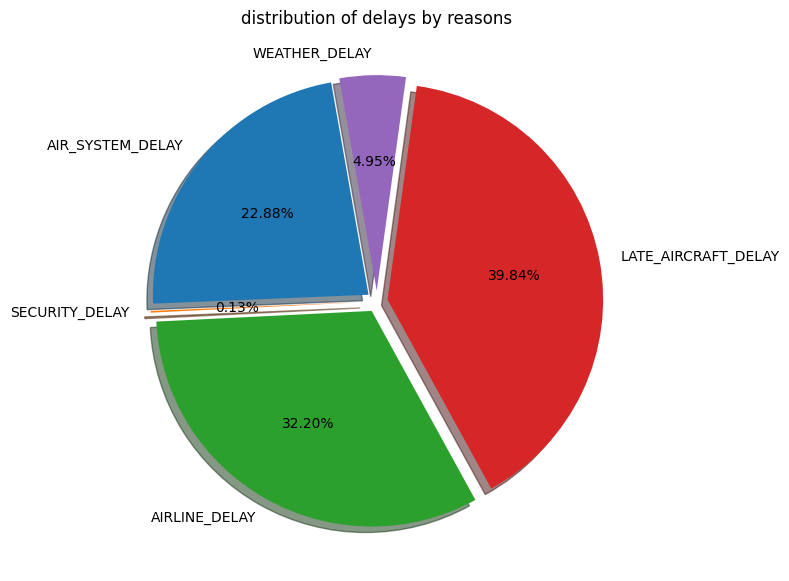

In [11]:
air_system_delay = df['AIR_SYSTEM_DELAY'].mean()
security_delay = df['SECURITY_DELAY'].mean()
airline_delay = df['AIRLINE_DELAY'].mean()
late_aircraft_delay = df['LATE_AIRCRAFT_DELAY'].mean()
weather_delay = df['WEATHER_DELAY'].mean()

data = {
    'AIR_SYSTEM_DELAY': air_system_delay,
    'SECURITY_DELAY': security_delay,
    'AIRLINE_DELAY': airline_delay,
    'LATE_AIRCRAFT_DELAY': late_aircraft_delay,
    'WEATHER_DELAY': weather_delay
}

keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(7, 7))
plt.pie(values, labels=keys, autopct='%1.2f%%', startangle=100, shadow=True, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('distribution of delays by reasons')
plt.show()

From this pie we can see our main problems of late aircrafr delay, airline delay, air system delay and weather delay.

I think that research on delays caused by late aircraft is very hard to do, because it shoul be caused by problems in origin airports. This is why I do an effort to observe disadvantages of systems of orogin airports.

------------------------

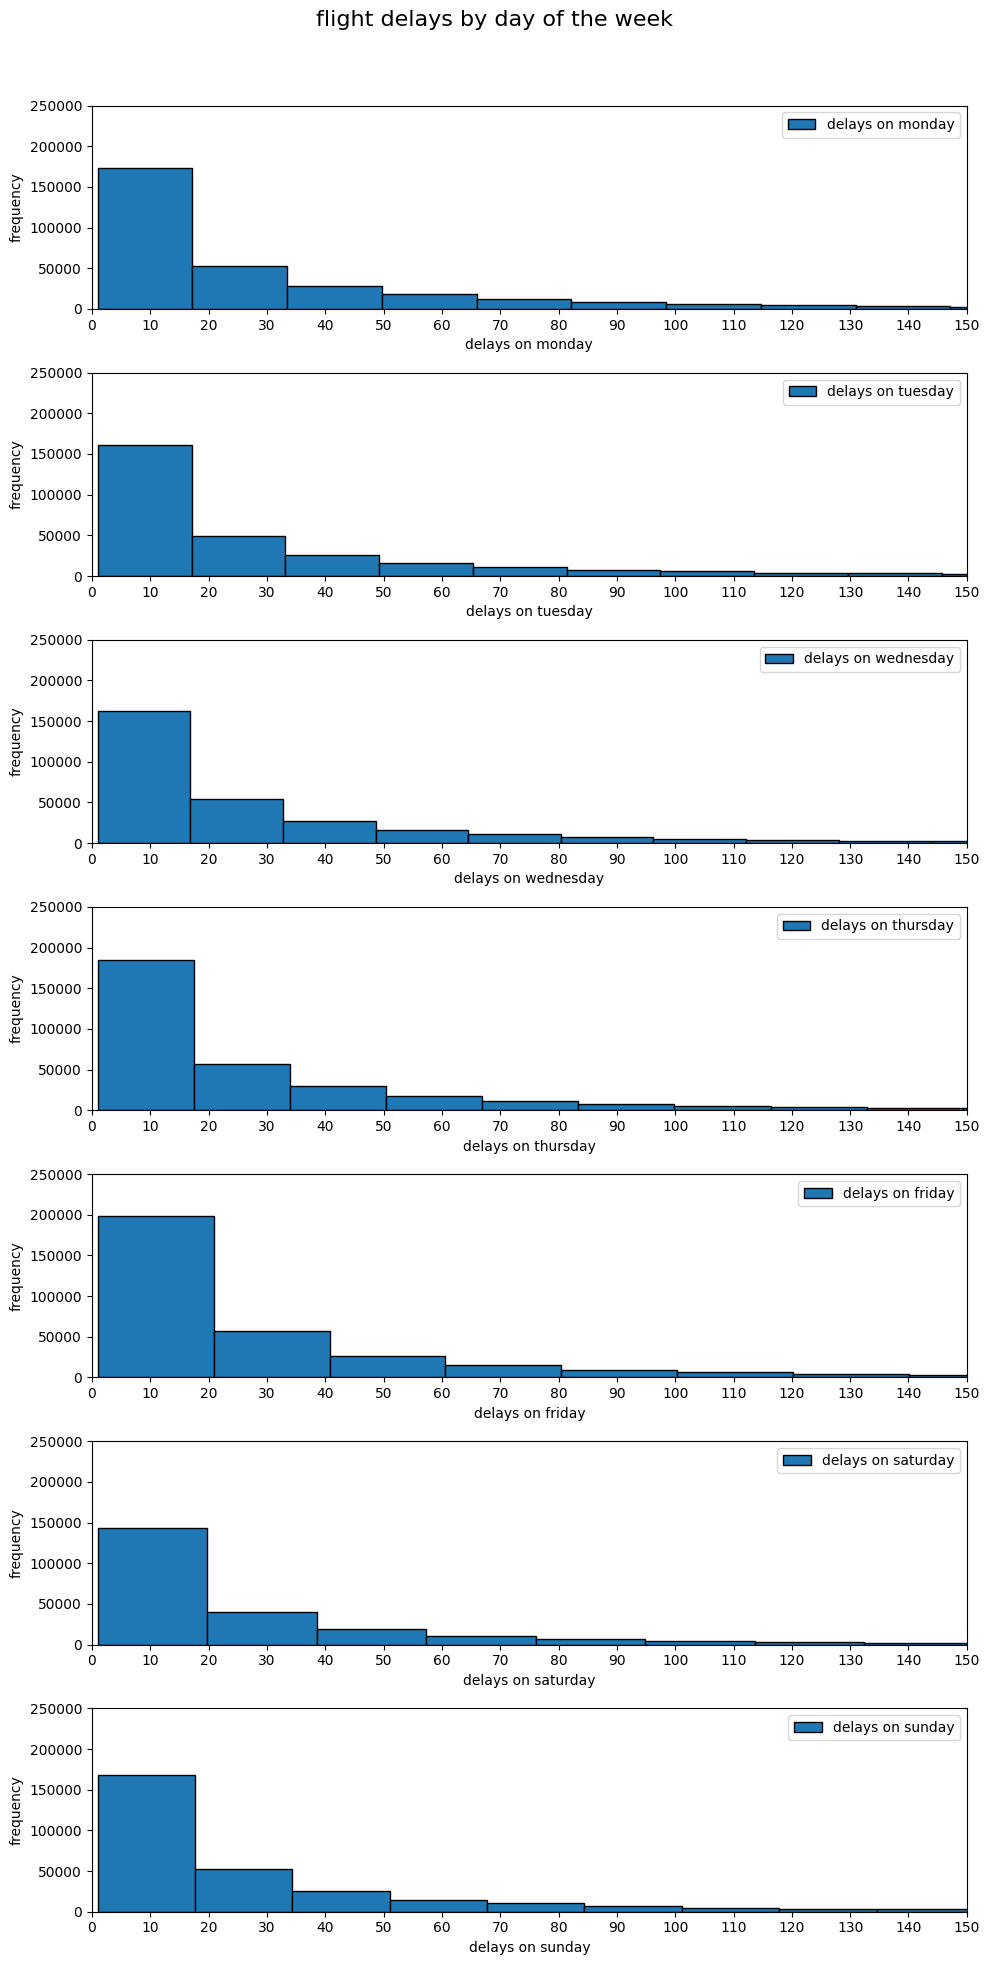

In [7]:
fig1, axes = plt.subplots(7, 1, figsize=(10, 20))
fig1.suptitle('flight delays by day of the week', fontsize=16)

days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

x_min = 0
x_max = 150
x_ticks = range(x_min, x_max + 1, 10)
y_ticks = range(0, 250001, 50000)

for i, ax in enumerate(axes):
    day_data = df[(df['DAY_OF_WEEK'] == i + 1) & (df['DEPARTURE_DELAY'] > 0)]['DEPARTURE_DELAY']
    ax.hist(day_data, bins=100, label=f'delays on {days[i]}', edgecolor='black')
    ax.set_xlabel(f'delays on {days[i]}')
    ax.set_ylabel('frequency')
    ax.legend()
    
    ax.set_xlim(x_min, x_max)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Our analysis reveals significantly higher departure delays on Mondays, Thursdays, and Fridays. This pattern suggests inefficiencies in our system that require urgent attention to improve speed and reliability. These delays may stem from connection issues between different airlines or bottlenecks in security and aircraft safety checks.

**System Shortcomings:**
1. **Connection Delays**: Poor coordination between airlines leads to cascading delays, especially on high-traffic days.
2. **Staffing Shortages**: Insufficient personnel on peak days slows down security screenings and safety inspections.
3. **Prolonged Checks**: Current processes for security and aircraft maintenance may be overly time-consuming.

**Recommendations:**
1. **Increased Staffing**: Boost the number of workers on Mondays, Thursdays, and Fridays to expedite security and safety procedures.
2. **Streamlined Processes**: Optimize security and aircraft inspection protocols to shorten delays without compromising safety.

----------------------

In [8]:
origin_airports = df.ORIGIN_AIRPORT.unique()

counts = {'IATA_CODE': [],
          'AIRPORT': [],
          'COUNT': []}

for airport in origin_airports:
    airport_info = df_airports[df_airports.IATA_CODE == airport]
    if airport_info.empty: 
        continue
    
    counts['IATA_CODE'].append(airport)
    counts['AIRPORT'].append(airport_info.AIRPORT.values[0])
    counts['COUNT'].append(df['ORIGIN_AIRPORT'].value_counts().get(airport, 0))

df_counts = pd.DataFrame(counts)
df_counts.head()

,IATA_CODE,AIRPORT,COUNT
0,ANC,Ted Stevens Anchorage International Airport,15849
1,LAX,Los Angeles International Airport,192399
2,SFO,San Francisco International Airport,145779
3,SEA,Seattle-Tacoma International Airport,110403
4,LAS,McCarran International Airport,132197


In [9]:
stats_of_airports = {'IATA_CODE': [],
          'AIRPORT': [],
          'MEAN': [],
          'STD': []}

for airport in origin_airports:
    airport_info = df_airports[df_airports.IATA_CODE == airport]
    if airport_info.empty: 
        continue
    
    stats_of_airports['IATA_CODE'].append(airport)
    stats_of_airports['AIRPORT'].append(airport_info.AIRPORT.values[0])
    stats_of_airports['MEAN'].append(df.loc[(df.DEPARTURE_DELAY > 0) & (df.ORIGIN_AIRPORT == airport), 'DEPARTURE_DELAY'].mean())
    stats_of_airports['STD'].append(df.loc[(df.DEPARTURE_DELAY > 0) & (df.ORIGIN_AIRPORT == airport), 'DEPARTURE_DELAY'].std())

df_stats_of_airports = pd.DataFrame(stats_of_airports)
df_stats_of_airports.head()

,IATA_CODE,AIRPORT,MEAN,STD
0,ANC,Ted Stevens Anchorage International Airport,26.910251,52.965045
1,LAX,Los Angeles International Airport,30.363635,47.098236
2,SFO,San Francisco International Airport,34.119609,52.916809
3,SEA,Seattle-Tacoma International Airport,25.158195,42.761974
4,LAS,McCarran International Airport,30.886587,49.552047


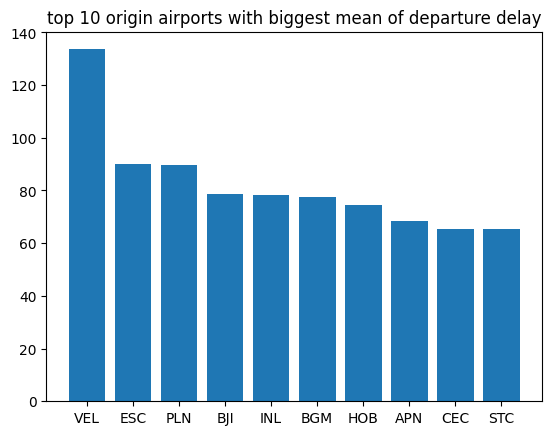

In [10]:
df_stats_sorted_of_airports = df_stats_of_airports.sort_values(by='MEAN', ascending=False)

plt.bar(df_stats_sorted_of_airports.IATA_CODE[:10], df_stats_sorted_of_airports.MEAN[:10])
plt.title('top 10 origin airports with biggest mean of departure delay')
plt.show()

On this bar we can see that a lot of airports have huge mean of delay. The average mean among all airports is around 32 minutes, but these ones are above it for sure. So, we need to observe them. May be this airports are small, that will make sutuation a litle better.

In [11]:
df_info_of_big_delay = df[df.ORIGIN_AIRPORT.isin(df_stats_sorted_of_airports.IATA_CODE[:20].tolist())]

df_counts_of_big_delay = df_info_of_big_delay['ORIGIN_AIRPORT'].value_counts()
df_counts_of_big_delay

ORIGIN_AIRPORT
CMI    1999
COU    1244
EGE    1203
DIK     921
BPT     910
PLN     731
RKS     672
BJI     664
ABR     663
INL     557
ESC     556
HOB     548
APN     547
MQT     296
BGM     259
VEL     200
CEC     174
ILG      95
HYA      82
STC      78
Name: count, dtype: int64

Thank God this airports are small. I believe that it is not so important to take them into account.

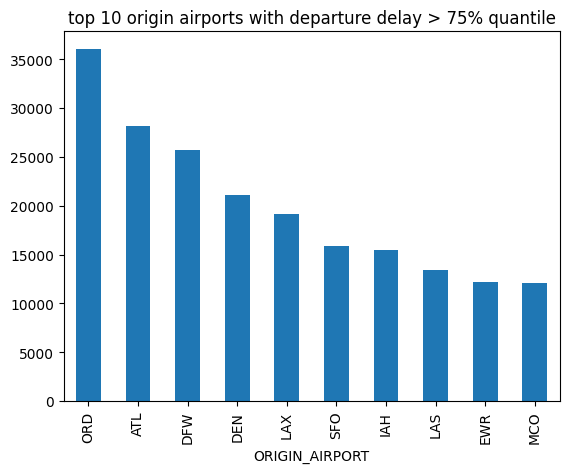

In [12]:
fig = plt.figure()
df[df['DEPARTURE_DELAY'] > 38]['ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar')
plt.title('top 10 origin airports with departure delay > 75% quantile')
plt.show()

In [13]:
filtered_airports = df_airports[df_airports['IATA_CODE'].isin(['ORD', 'ATL', 'DFW', 'DEN', 'LAX'])]
print(filtered_airports[['IATA_CODE', 'AIRPORT']].reindex([228, 20, 86, 85, 176]))

    IATA_CODE                                           AIRPORT
228       ORD              Chicago O'Hare International Airport
20        ATL  Hartsfield-Jackson Atlanta International Airport
86        DFW           Dallas/Fort Worth International Airport
85        DEN                      Denver International Airport
176       LAX                 Los Angeles International Airport


The accompanying bar chart identifies the top 10 origin airports with departure delays exceeding the 75th percentile, based on 2015 data. Airports such as ORD (Chicago O'Hare International Airport), ATL (Hartsfield-Jackson Atlanta International Airport), and DFW (Dallas/Fort Worth International Airport) lead with the highest counts, indicating significant operational bottlenecks. This suggests systemic issues that disproportionately affect major hubs.

**System Shortcomings:**
1. **High Delay Concentration**: Major airports like ORD, ATL, and DFW experience excessive departure delays, likely due to overcapacity or inefficient handling.
2. **Inadequate Resource Allocation**: The volume of delays suggests insufficient staffing or infrastructure to manage peak loads.
3. **Lack of Scalability**: Current systems fail to scale effectively to handle high-traffic airports.

**Recommendations:**
1. **Targeted Capacity Expansion**: Invest in infrastructure upgrades at ORD, ATL, and DFW, such as additional runways or gates, to alleviate congestion.
2. **Enhanced Staffing Plans**: Increase personnel during peak hours at these airports to streamline departure processes.
3. **Traffic Management Optimization**: Implement advanced air traffic control systems to better distribute flights and reduce delays at high-volume hubs.

-----------------------

Let us glimplse on airlines and make similar observations.

In [14]:
airlines = df['AIRLINE'].unique()

stats_of_airlines = {'IATA_CODE': [],
          'AIRLINE': [],
          'MEAN': [],
          'STD': []}

for airline in airlines:
    airline_info = df_airlines[df_airlines.IATA_CODE == airline]
    if airline_info.empty: 
        continue

    stats_of_airlines['IATA_CODE'].append(airline)
    stats_of_airlines['AIRLINE'].append(airline_info.AIRLINE.values[0]) #append(airport_info.AIRPORT.values[0])
    stats_of_airlines['MEAN'].append(df.loc[(df.DEPARTURE_DELAY > 0) & (df.AIRLINE == airline), 'DEPARTURE_DELAY'].mean())
    stats_of_airlines['STD'].append(df.loc[(df.DEPARTURE_DELAY > 0) & (df.AIRLINE == airline), 'DEPARTURE_DELAY'].std())

df_stats_of_airlines = pd.DataFrame(stats_of_airlines)
df_stats_of_airlines.head()

,IATA_CODE,AIRLINE,MEAN,STD
0,AS,Alaska Airlines Inc.,25.879313,43.161756
1,AA,American Airlines Inc.,34.253064,63.832248
2,US,US Airways Inc.,28.420968,43.112889
3,DL,Delta Air Lines Inc.,29.621197,57.426958
4,NK,Spirit Air Lines,41.849567,54.670785


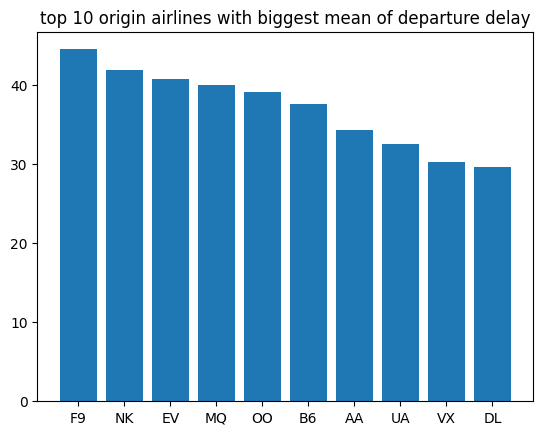

In [15]:
df_stats_sorted_of_airlines = df_stats_of_airlines.sort_values(by='MEAN', ascending=False)

plt.bar(df_stats_sorted_of_airlines.IATA_CODE[:10], df_stats_sorted_of_airlines.MEAN[:10])
plt.title('top 10 origin airlines with biggest mean of departure delay')
plt.show()

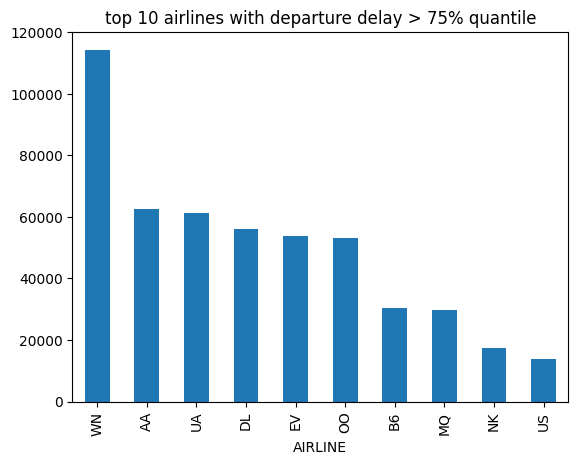

In [16]:
fig = plt.figure()
df[df['DEPARTURE_DELAY'] > 38]['AIRLINE'].value_counts()[:10].plot(kind='bar')
plt.title('top 10 airlines with departure delay > 75% quantile')
plt.show()

In [17]:
df_info_of_big_delay_of_airlines = df[df.AIRLINE.isin(df_stats_sorted_of_airlines.IATA_CODE[:20].tolist())]

df_counts_of_big_delay_of_airlines = df_info_of_big_delay_of_airlines['AIRLINE'].value_counts()
df_counts_of_big_delay_of_airlines

AIRLINE
WN    1245053
DL     871946
AA     714855
OO     577943
EV     556425
UA     508916
MQ     279431
B6     262687
US     194586
AS     171692
NK     115343
F9      90231
HA      76093
VX      61365
Name: count, dtype: int64

From the three previous plots, we can extract valuable insights into airline performance. 

Firstly, although airline 'WN' is a major carrier, it experiences a high frequency of lengthy delays. This indicates operational inefficiencies that cannot be overlooked, given its size and influence on the system. Secondly, airlines such as 'OO' and 'AA', despite their significant scale, exhibit substantial mean delays. This level of underperformance is unacceptable for large operators and demands immediate action.

**System Shortcomings:**
1. **Inefficiency in Major Airlines**: 'WN' suffers from frequent long delays, likely due to poor scheduling or resource management.
2. **Unacceptable Delays in Big Carriers**: 'OO' and 'AA' show high average delays, reflecting systemic issues in their operations.

**Recommendations:**
1. **Targeted Oversight for 'WN'**: Conduct a detailed audit of 'WN’s operations to identify and address the root causes of prolonged delays, such as fleet management or crew scheduling.
2. **Performance Standards for 'OO' and 'AA'**: Impose stricter performance benchmarks for large airlines like 'OO' and 'AA', with penalties for consistent delays, to ensure accountability and improvement.

----------------------------------

Now I'd like to watch closer to delays, which are caused by weather conditions.

In [18]:
df_weather_delay = df[df['WEATHER_DELAY'] > 0]

I think that it will be more informative to split this observation on 4 groups: winter, spring, summer and autumn. And see top airports with biggest mean of weather delay.

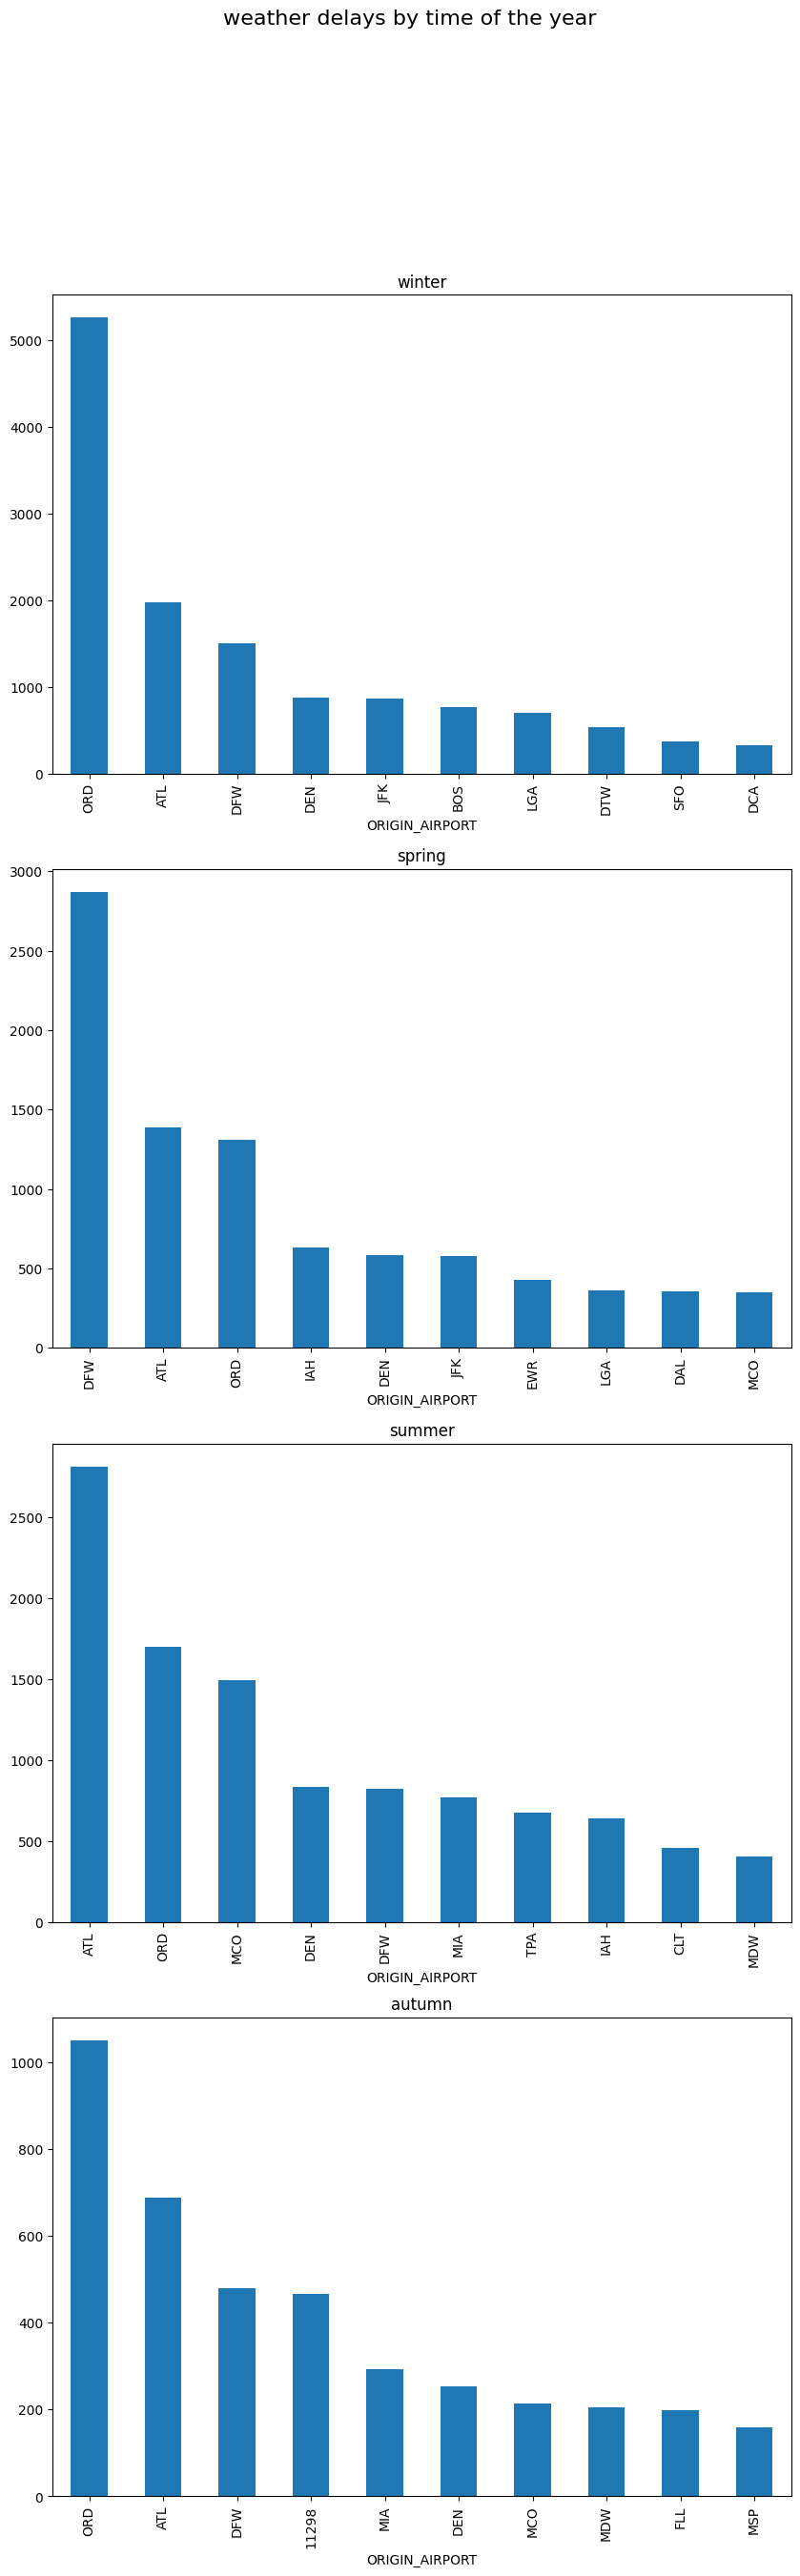

In [19]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 30))
fig1.suptitle('weather delays by time of the year', fontsize=16)

df_weather_delay[df_weather_delay['MONTH'].isin([12, 1, 2])]['ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar', ax=ax1)
ax1.set_title('winter')
df_weather_delay[df_weather_delay['MONTH'].isin([3, 4, 5])]['ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar', ax=ax2)
ax2.set_title('spring')
df_weather_delay[df_weather_delay['MONTH'].isin([6, 7, 8])]['ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar', ax=ax3)
ax3.set_title('summer')
df_weather_delay[df_weather_delay['MONTH'].isin([9, 10, 11])]['ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar', ax=ax4)
ax4.set_title('autumn')

plt.show()

But that is actually not useful plots. I improved them by using mean of weather delay.

In [20]:
seasons = {
    'winter': [12, 1, 2],
    'spring': [3, 4, 5],
    'summer': [6, 7, 8],
    'autumn': [9, 10, 11]
}

season_stats = {}

for season_name, months in seasons.items():
    df_season = df_weather_delay[df_weather_delay['MONTH'].isin(months)]
    
    origin_airports = df_season['ORIGIN_AIRPORT'].unique()
    
    stats_of_airports = {
        'IATA_CODE': [],
        'AIRPORT': [],
        'MEAN': [],
        'STD': []
    }
    
    for airport in origin_airports:
        airport_info = df_airports[df_airports.IATA_CODE == airport]
        if airport_info.empty:
            continue
        
        stats_of_airports['IATA_CODE'].append(airport)
        stats_of_airports['AIRPORT'].append(airport_info.AIRPORT.values[0])
        
        filtered_data = df_season[(df_season.ORIGIN_AIRPORT == airport) & (df_season.WEATHER_DELAY > 0)]
        
        stats_of_airports['MEAN'].append(filtered_data['WEATHER_DELAY'].mean())
        stats_of_airports['STD'].append(filtered_data['WEATHER_DELAY'].std())
    
    df_stats_of_airports = pd.DataFrame(stats_of_airports)
    
    season_stats[season_name] = df_stats_of_airports

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


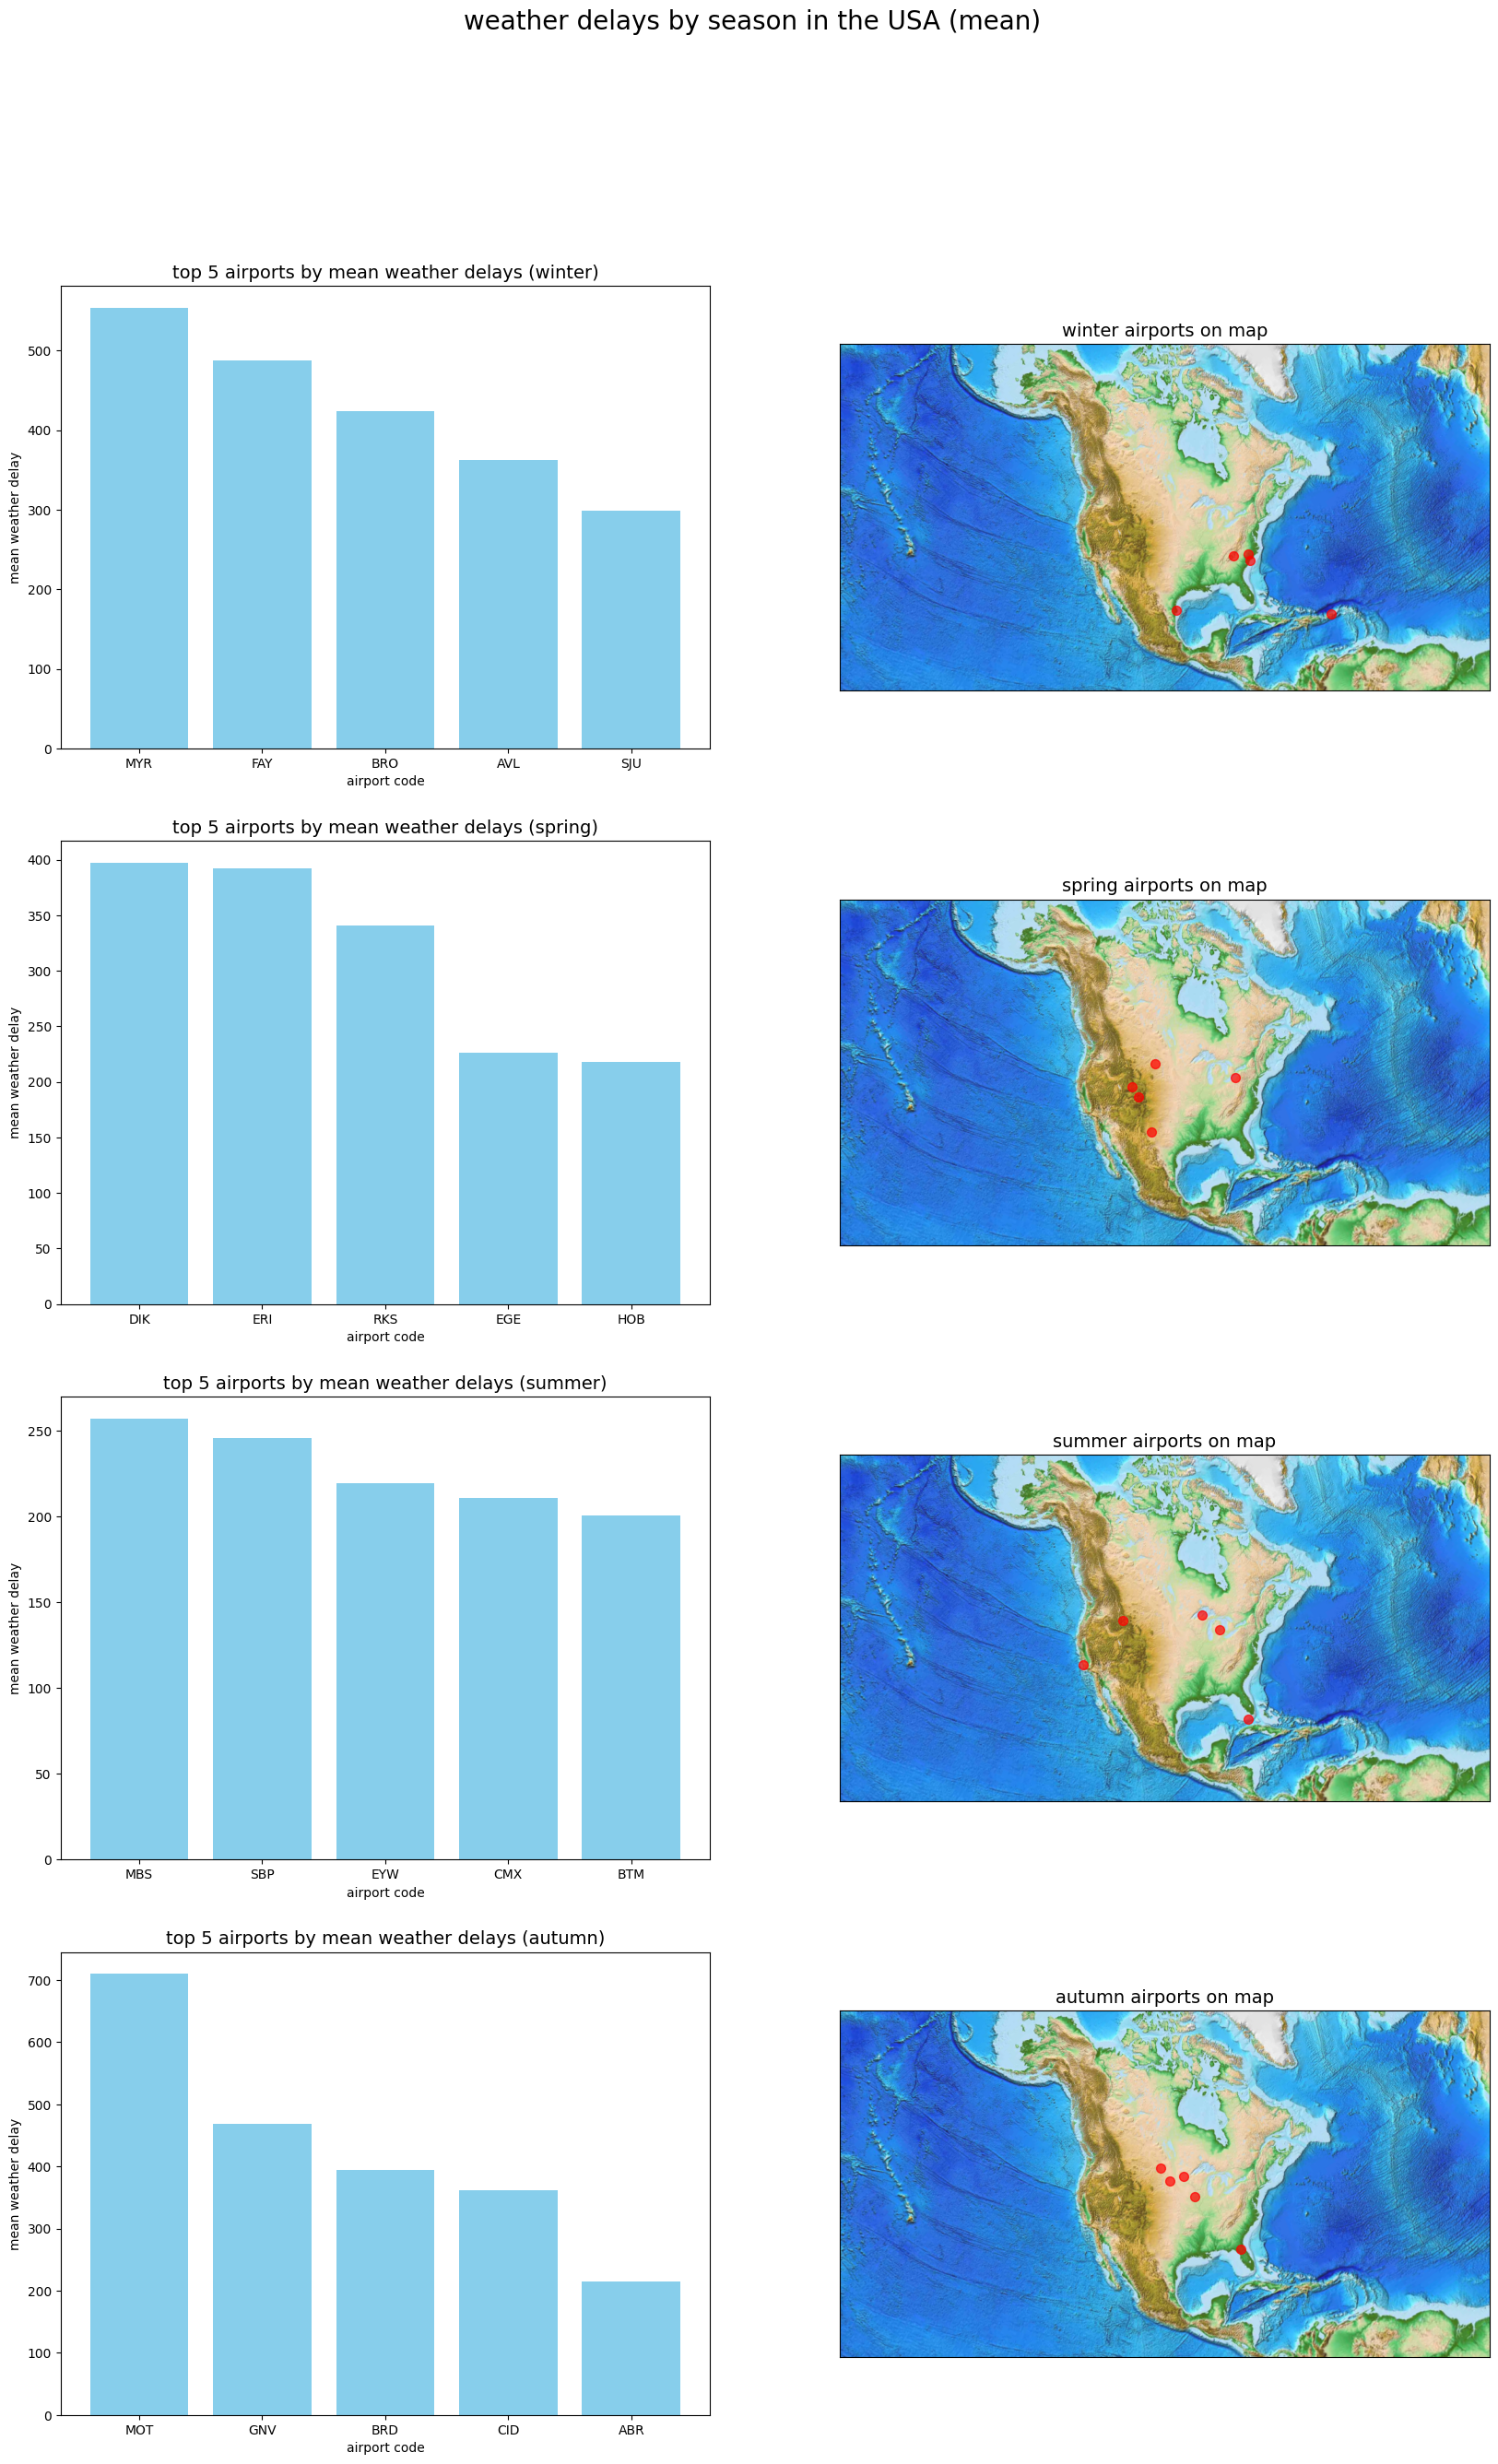

In [32]:
from mpl_toolkits.basemap import Basemap

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('weather delays by season in the USA (mean)', fontsize=20)

for i, (season_name, df_stats_of_airports) in enumerate(season_stats.items()):
    df_stats_of_airports = df_stats_of_airports.sort_values(by='MEAN', ascending=False)
    
    ax_bar = axes[i, 0]
    ax_bar.bar(df_stats_of_airports['IATA_CODE'][:5], df_stats_of_airports['MEAN'][:5], color='skyblue')
    ax_bar.set_title(f'top 5 airports by mean weather delays ({season_name})', fontsize=14)
    ax_bar.set_xlabel('airport code')
    ax_bar.set_ylabel('mean weather delay')
    
    ax_map = axes[i, 1]
    m = Basemap(ax=ax_map, projection='lcc', resolution=None,
                width=15E6, height=8E6,
                lat_0=45, lon_0=-100)
    m.etopo(scale=0.5, alpha=0.9)
    
    df_top_airports = df_airports[df_airports['IATA_CODE'].isin(df_stats_of_airports['IATA_CODE'][:5])]
    
    lons = df_top_airports['LONGITUDE'].values
    lats = df_top_airports['LATITUDE'].values
    x, y = m(lons, lats)
    
    m.scatter(x, y, s=50, c='red', marker='o', alpha=0.7, label='top 5 airports')
    
    ax_map.set_title(f'{season_name} airports on map', fontsize=14)

plt.show()

The graphics presented below highlight which airports are most affected by weather conditions across different seasons. Notably, during winter, significant issues emerge in the South, particularly in Florida, where weather disruptions are unexpectedly severe. This reveals a critical vulnerability in these regions that requires targeted intervention.

**System Shortcomings:**
1. **Regional Weather Vulnerability**: Southern airports, especially in Florida, are unprepared for winter weather impacts.
2. **Inadequate Preparedness**: Current infrastructure and planning fail to mitigate seasonal disruptions effectively.

**Recommendations:**
1. **Focus on Southern Airports**: Prioritize resources to enhance weather resilience in Florida and other southern airports, such as installing advanced de-icing equipment.
2. **Seasonal Preparedness Plans**: Develop and implement tailored winter contingency strategies for these areas to reduce delays and improve operational stability.

--------------

In [13]:
df_mask = df[['AIRLINE_DELAY']].isna().any(axis=1)
df = df.loc[~df_mask]

In [14]:
df[df['DEPARTURE_DELAY'] > 0].describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,950873.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,950873.0,6.234901,3.401921,1.0,3.0,6.0,9.0,12.0
DAY,950873.0,15.558007,8.791445,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,950873.0,3.876032,1.985025,1.0,2.0,4.0,5.0,7.0
FLIGHT_NUMBER,950873.0,2177.571220,1772.696007,1.0,724.0,1652.0,3260.0,9320.0
SCHEDULED_DEPARTURE,950873.0,1492.071347,445.768557,1.0,1144.0,1535.0,1845.0,2359.0
DEPARTURE_TIME,950873.0,1557.765225,479.402272,1.0,1225.0,1624.0,1936.0,2400.0
DEPARTURE_DELAY,950873.0,61.871075,67.819293,1.0,24.0,42.0,77.0,1988.0
TAXI_OUT,950873.0,19.225305,13.204496,1.0,11.0,15.0,22.0,225.0
WHEELS_OFF,950873.0,1577.545935,488.417779,1.0,1239.0,1639.0,1952.0,2400.0


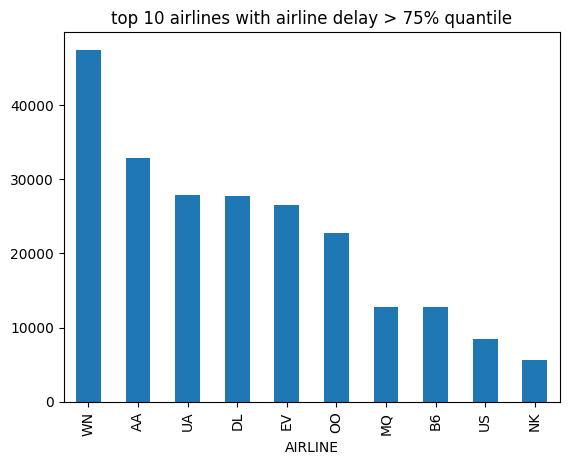

In [20]:
fig = plt.figure()
df[df['AIRLINE_DELAY'] > 21]['AIRLINE'].value_counts()[:10].plot(kind='bar')
plt.title('top 10 airlines with airline delay > 75% quantile')
plt.show()

And again we see almost the same ailines: 'WN', 'AA', 'OO' and so on.
So we really should focus on this airlines and direct them our letters. This airlines make US transport system worse.

In [19]:
filtered_airlines = df_airlines[df_airlines['IATA_CODE'].isin(['WN', 'AA', 'UA', 'DL', 'EV', 'OO'])]
print(filtered_airlines[['IATA_CODE', 'AIRLINE']].reindex([8, 1, 0, 9, 10, 5]))

   IATA_CODE                      AIRLINE
8         WN       Southwest Airlines Co.
1         AA       American Airlines Inc.
0         UA        United Air Lines Inc.
9         DL         Delta Air Lines Inc.
10        EV  Atlantic Southeast Airlines
5         OO        Skywest Airlines Inc.


The bar chart below highlights the top 10 airlines with departure delays exceeding the 75th percentile, based on 2015 data. Airlines such as WN (Southwest Airlines), AA (American Airlines), and UA (United Airlines) lead with the highest counts, each contributing significantly to system-wide delays. This recurring pattern, also observed in previous analyses, underscores a persistent issue with these carriers.

**System Shortcomings:**
1. **Chronic Delays by Major Airlines**: Airlines like WN, AA, and UA consistently exhibit high delay counts, suggesting operational inefficiencies.
2. **Lack of Accountability**: The repeated poor performance of these airlines indicates insufficient oversight or corrective measures.
3. **System-Wide Impact**: These delays by major carriers degrade the overall reliability of the U.S. transportation network.

**Recommendations:**
1. **Targeted Performance Reviews**: Conduct in-depth audits of WN, AA, UA, and other listed airlines to identify specific operational bottlenecks.
2. **Enforce Accountability Measures**: Impose fines or performance improvement plans on airlines with excessive delays to ensure compliance with service standards.
3. **Support System Improvements**: Collaborate with these airlines to implement advanced scheduling and resource management tools to reduce delays.

-----------